# Importing the dataset and dependencies

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_excel('/content/estm (1).xlsx')

# Basic Information of the dataset

In [97]:
df.head()

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT,reference
0,BiSb(Se0.92Br0.08)3,300.0,-110.0,27766.0,0.63,0.000336,0.159985,10.1002/adfm.201806558
1,BiSb(Se0.92Br0.08)3,400.0,-138.0,23883.0,0.57,0.000455,0.319177,10.1002/adfm.201806558
2,BiSb(Se0.92Br0.08)3,500.0,-163.0,20850.0,0.53,0.000554,0.522607,10.1002/adfm.201806558
3,BiSb(Se0.92Br0.08)3,600.0,-181.0,19000.0,0.51,0.000622,0.732305,10.1002/adfm.201806558
4,BiSb(Se0.92Br0.08)3,700.0,-193.0,17925.0,0.50,0.000668,0.940000,10.1002/adfm.201806558


In [98]:
df.shape

(5205, 8)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5205 entries, 0 to 5204
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Formula                       5205 non-null   object 
 1   temperature(K)                5205 non-null   float64
 2   seebeck_coefficient(μV/K)     5205 non-null   float64
 3   electrical_conductivity(S/m)  5205 non-null   float64
 4   thermal_conductivity(W/mK)    5205 non-null   float64
 5   power_factor(W/mK2)           5205 non-null   float64
 6   ZT                            5205 non-null   float64
 7   reference                     5205 non-null   object 
dtypes: float64(6), object(2)
memory usage: 325.4+ KB


In [100]:
df.isnull().sum()

Formula                         0
temperature(K)                  0
seebeck_coefficient(μV/K)       0
electrical_conductivity(S/m)    0
thermal_conductivity(W/mK)      0
power_factor(W/mK2)             0
ZT                              0
reference                       0
dtype: int64

In [101]:
df.describe()

,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT
count,5205.000000,5205.000000,5.205000e+03,5205.000000,5.205000e+03,5.205000e+03
mean,539.217533,73.183879,1.095845e+05,2.250818,9.920448e-04,3.541950e-01
std,192.422345,208.924232,1.467224e+06,3.290789,1.123065e-03,3.475057e-01
min,10.000000,-1174.000000,4.259000e-04,0.070000,2.079090e-11,4.603919e-10
25%,392.000000,-108.320000,7.059000e+03,0.734500,2.413930e-04,7.808195e-02
50%,523.000000,100.690000,3.020000e+04,1.336300,6.262515e-04,2.467954e-01
75%,673.000000,202.060000,9.179500e+04,2.694400,1.301174e-03,5.340450e-01
max,1275.000000,1052.400000,9.464455e+07,77.160000,7.605400e-03,2.277911e+00


# Data analysis

In [102]:
df['electrical_conductivity(S/m)'] = np.log(df['electrical_conductivity(S/m)'])
df['thermal_conductivity(W/mK)'] = np.log(df['thermal_conductivity(W/mK)'])

In [103]:
df.drop('reference', axis = 1, inplace = True)

In [104]:
df.head()

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT
0,BiSb(Se0.92Br0.08)3,300.0,-110.0,10.231568,-0.462035,0.000336,0.159985
1,BiSb(Se0.92Br0.08)3,400.0,-138.0,10.080922,-0.562119,0.000455,0.319177
2,BiSb(Se0.92Br0.08)3,500.0,-163.0,9.945109,-0.634878,0.000554,0.522607
3,BiSb(Se0.92Br0.08)3,600.0,-181.0,9.852194,-0.673345,0.000622,0.732305
4,BiSb(Se0.92Br0.08)3,700.0,-193.0,9.793952,-0.693147,0.000668,0.940000


In [105]:
df[df['ZT'] > 0.9]

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT
4,BiSb(Se0.92Br0.08)3,700.0,-193.00,9.793952,-0.693147,0.000668,0.940000
5,BiSb(Se0.92Br0.08)3,800.0,-203.00,9.760771,-0.820981,0.000715,1.299207
10,BiSb(Se0.94Br0.06)3,700.0,-203.00,9.697508,-0.693147,0.000671,0.939062
11,BiSb(Se0.94Br0.06)3,800.0,-219.00,9.647240,-0.820981,0.000742,1.349797
17,BiSb(Se0.96Br0.04)3,800.0,-228.00,9.433484,-0.798508,0.000650,1.155200
...,...,...,...,...,...,...,...
4933,AgCuTe0.8Se0.2,723.0,179.70,10.269345,-0.486296,0.000931,1.092700
4936,AgCuTe0.7Se0.3,522.0,231.35,9.495594,-1.002393,0.000712,1.012576
4937,AgCuTe0.7Se0.3,623.0,250.19,9.363061,-0.839330,0.000729,1.051647
4938,AgCuTe0.7Se0.3,723.0,254.27,9.224835,-0.678456,0.000656,0.923600


In [106]:
df[df['ZT'] > 0.9].shape

(448, 7)

There are 448 materials with ZT value > 0.9

In [107]:
df[df['ZT'] >= 1]

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT
5,BiSb(Se0.92Br0.08)3,800.0,-203.00,9.760771,-0.820981,0.000715,1.299207
11,BiSb(Se0.94Br0.06)3,800.0,-219.00,9.647240,-0.820981,0.000742,1.349797
17,BiSb(Se0.96Br0.04)3,800.0,-228.00,9.433484,-0.798508,0.000650,1.155200
23,BiSb(Se0.98Br0.02)3,800.0,-229.00,9.403272,-0.733969,0.000636,1.060007
61,In4Se2.32Cl0.03,698.0,-311.00,9.292842,-0.349557,0.001050,1.039961
...,...,...,...,...,...,...,...
4928,AgCuTe0.9Se0.1,723.0,225.87,9.790543,-0.548527,0.000911,1.140398
4933,AgCuTe0.8Se0.2,723.0,179.70,10.269345,-0.486296,0.000931,1.092700
4936,AgCuTe0.7Se0.3,522.0,231.35,9.495594,-1.002393,0.000712,1.012576
4937,AgCuTe0.7Se0.3,623.0,250.19,9.363061,-0.839330,0.000729,1.051647


In [108]:
df[df['ZT'] >= 1].shape

(321, 7)

There are 321 materials with ZT value greater than 1

In [109]:
df['ZT'].min()

4.6039186285714285e-10

In [110]:
df['ZT'].max()

2.277910891079999

In [111]:
df['ZT'].mean()

0.3541949515103932

In [112]:
df[df['ZT'] == df['ZT'].max()]

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT
104,Cu2Se,400.0,166.7,10.620986,-1.609438,0.001139,2.277911


**Cu2Se** is the material with highest ZT value in this dataset

In [113]:
df['thermal_conductivity(W/mK)'].min()

-2.659260036932778

In [114]:
df[df['thermal_conductivity(W/mK)'] == df['thermal_conductivity(W/mK)'].min()]

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT
1050,LaCo0.5(Ni0.5Fe0.5)0.5O3,300.0,109.0,6.966024,-2.65926,0.000013,0.052


**LaCo0.5(Ni0.5Fe0.5)0.5O3** is the material with lowest thermal conductivity, which is a crucial parameter for having high ZT value

In [115]:
df['Formula'].value_counts()

Formula
SnSe              43
SnTe              39
BiCuSeO           30
GeTe              28
Cu2Se             25
                  ..
La2.0Co4Sb12       1
LaCo4Sb12          1
Cu2Mo6Te8          1
Ti0.95Al0.05O2     1
Tl9.0Sb1.0Te6      1
Name: count, Length: 880, dtype: int64

**SnSe** is the material/ chemical composition which occurs the most number of times in the dataset, it occurs 43 times

In [116]:
df[df['Formula'] == 'SnSe']

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT
1332,SnSe,323.0,357.00,4.762174,-0.127833,1.491153e-05,0.006000
1333,SnSe,373.0,379.00,5.455321,-0.261365,3.361199e-05,0.016000
1334,SnSe,423.0,397.00,5.883322,-0.371064,5.658163e-05,0.037000
1335,SnSe,523.0,371.00,5.817111,-0.510826,4.624738e-05,0.040312
1336,SnSe,573.0,384.00,5.793014,-0.478036,4.836557e-05,0.044699
1337,SnSe,473.0,391.00,6.045005,-0.400478,6.451578e-05,0.045000
1338,SnSe,623.0,384.00,6.150603,-0.527633,6.915686e-05,0.073025
1339,SnSe,673.0,375.00,6.655440,-0.673345,1.092656e-04,0.144188
1340,SnSe,723.0,356.00,7.188413,-0.544727,1.677985e-04,0.209169
1341,SnSe,773.0,325.00,7.851661,-0.579818,2.714562e-04,0.374707


## For SnSe system let's plot some graphs to get any correlations

In [117]:
snse = df[df['Formula'] == 'SnSe']

In [118]:
snse.head()

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT
1332,SnSe,323.0,357.0,4.762174,-0.127833,0.000015,0.006000
1333,SnSe,373.0,379.0,5.455321,-0.261365,0.000034,0.016000
1334,SnSe,423.0,397.0,5.883322,-0.371064,0.000057,0.037000
1335,SnSe,523.0,371.0,5.817111,-0.510826,0.000046,0.040312
1336,SnSe,573.0,384.0,5.793014,-0.478036,0.000048,0.044699


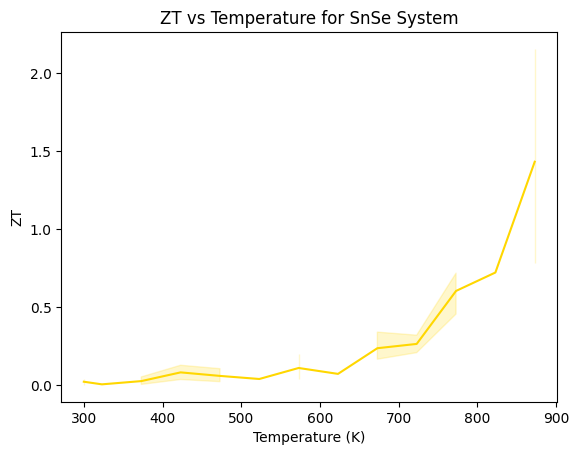

In [119]:
sns.lineplot(data = snse, x = 'temperature(K)', y = 'ZT', color = 'gold')
plt.xlabel('Temperature (K)')
plt.ylabel('ZT')
plt.title('ZT vs Temperature for SnSe System')
plt.show()

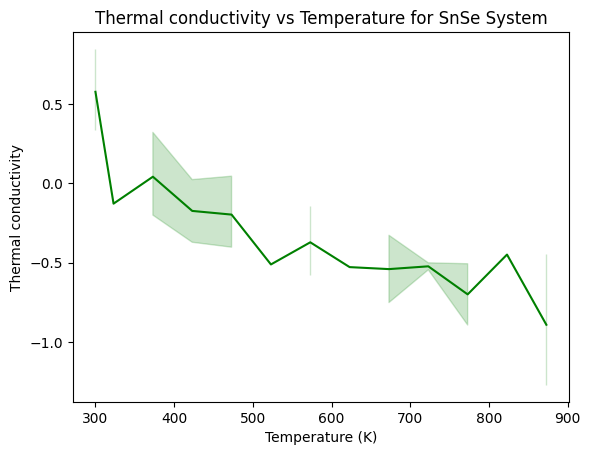

In [120]:
sns.lineplot(data = snse, x = 'temperature(K)', y = 'thermal_conductivity(W/mK)', color = 'g')
plt.xlabel('Temperature (K)')
plt.ylabel('Thermal conductivity')
plt.title('Thermal conductivity vs Temperature for SnSe System')
plt.show()

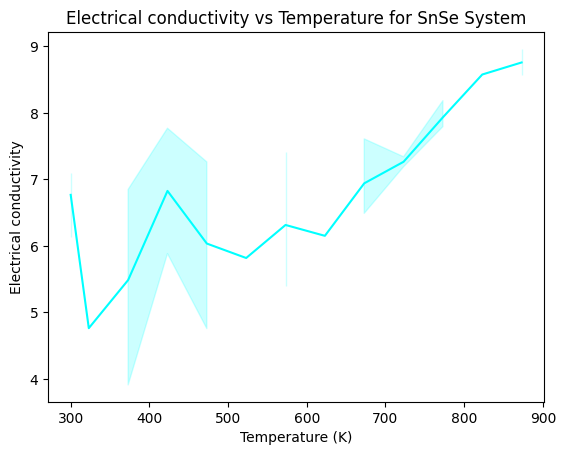

In [121]:
sns.lineplot(data = snse, x = 'temperature(K)', y = 'electrical_conductivity(S/m)', color = 'cyan')
plt.xlabel('Temperature (K)')
plt.ylabel('Electrical conductivity')
plt.title('Electrical conductivity vs Temperature for SnSe System')
plt.show()

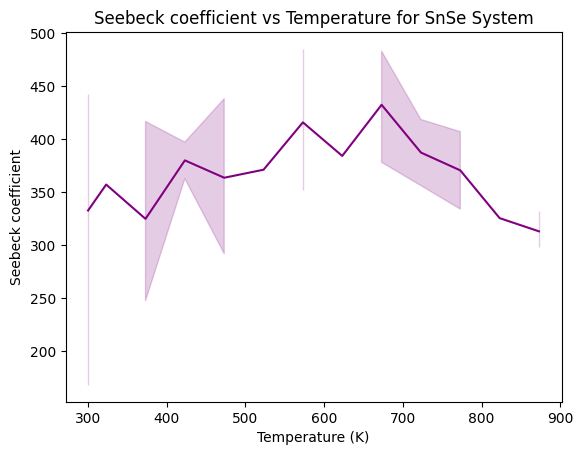

In [122]:
sns.lineplot(data = snse, x = 'temperature(K)', y = 'seebeck_coefficient(μV/K)', color = 'purple')
plt.xlabel('Temperature (K)')
plt.ylabel('Seebeck coefficient')
plt.title('Seebeck coefficient vs Temperature for SnSe System')
plt.show()

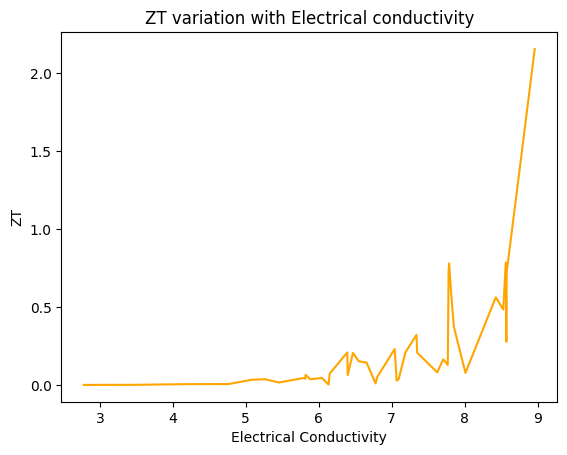

In [123]:
sns.lineplot(data = snse, x = 'electrical_conductivity(S/m)', y = 'ZT', color = 'orange')
plt.xlabel('Electrical Conductivity')
plt.ylabel('ZT')
plt.title('ZT variation with Electrical conductivity')
plt.show()

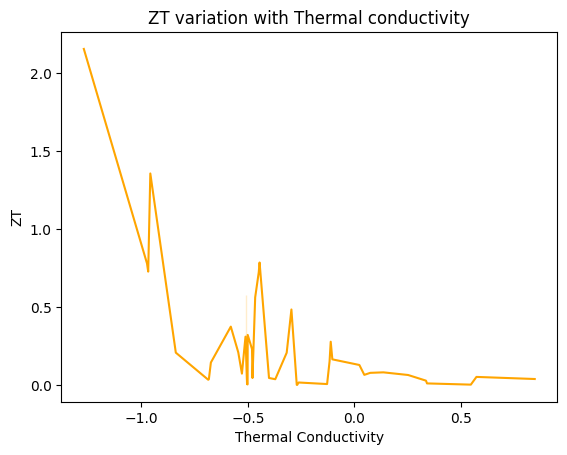

In [124]:
sns.lineplot(data = snse, x = 'thermal_conductivity(W/mK)', y = 'ZT', color = 'orange')
plt.xlabel('Thermal Conductivity')
plt.ylabel('ZT')
plt.title('ZT variation with Thermal conductivity')
plt.show()

# Encoding the categorical features